In [1]:
## Prob 1.

In [2]:
# import the packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = '/Users/pradeepsingh/cs696/hw3/gpa-gre.csv'

In [4]:
gre_data = pd.read_csv(path)

In [5]:
gre_data.head()

,Year,GPA,Verbal,Quant
0,1,4.00,420.0,800.0
1,1,3.88,480.0,770.0
2,1,3.88,480.0,780.0
3,1,3.87,440.0,690.0
4,1,3.85,320.0,800.0


In [6]:
# combine the 'Verbal' and 'Quant' score in 'combined GRE score'.
gre_data['combined GRE'] = gre_data['Verbal'] + gre_data['Quant']  # assigned to a column

In [7]:
gre_data.head()

,Year,GPA,Verbal,Quant,combined GRE
0,1,4.00,420.0,800.0,1220.0
1,1,3.88,480.0,770.0,1250.0
2,1,3.88,480.0,780.0,1260.0
3,1,3.87,440.0,690.0,1130.0
4,1,3.85,320.0,800.0,1120.0


In [8]:
gre_data.isnull().sum().sum()

18

In [9]:
gre_data = gre_data.dropna()

In [10]:
X = gre_data[['combined GRE']]
y = gre_data[['GPA']]

### Split the data in train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Regression Model

In [12]:
regression_model = LinearRegression()

In [13]:
# fitting the model
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# predict
y_pred = regression_model.predict(X_test)

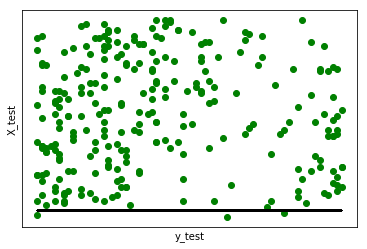

In [15]:
plt.scatter(X_test, y_test,color='g')
plt.plot(X_test, y_pred,color='k')
plt.ylabel('X_test')
plt.xlabel('y_test')
plt.xticks(())
plt.yticks(())
plt.show()


In [16]:
# The coefficients --
print('Coefficient: \n', regression_model.coef_)
# The Intercept --
print('Intercept: \n', regression_model.intercept_)

Coefficient: 
 [[0.00060122]]
Intercept: 
 [2.79868197]


In [17]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.08


### B. r2 score of the model.

In [18]:
# variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.10


### C. Residual Plot of the data from the model.

In [19]:
residuals = y_pred - y_test

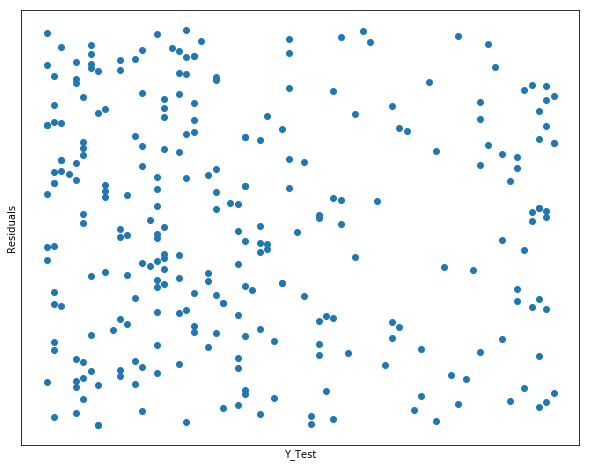

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,residuals)
plt.ylabel('Residuals')
plt.xlabel('Y_Test')
plt.xticks(())
plt.yticks(())
plt.show()